## Neural Network From Scratch In Python

### Step 1: Download MNIST images


In [2]:
# Pasted from Geeks for Geek
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

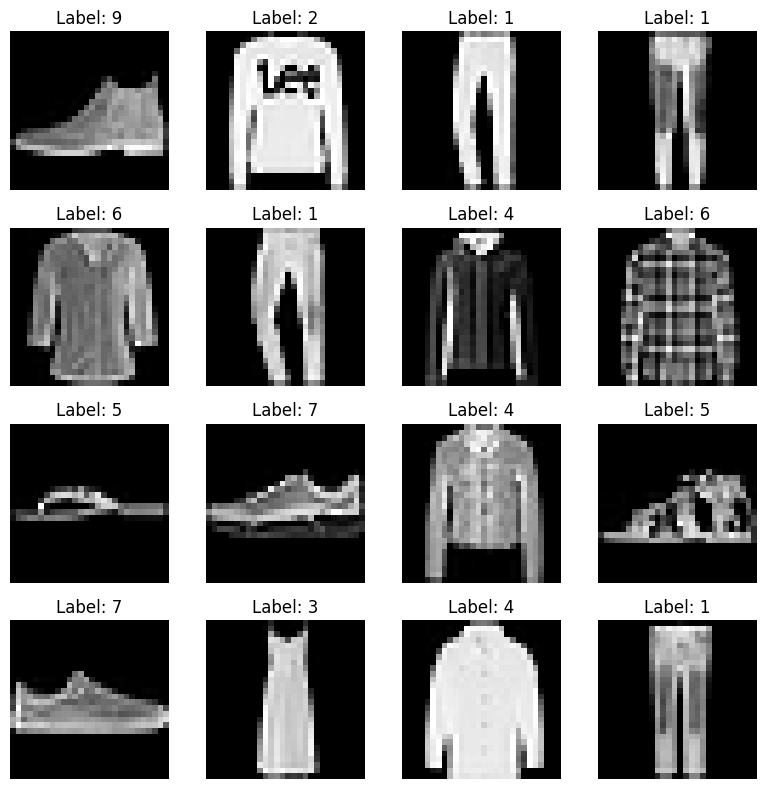

In [54]:
# Define the transformation
transform = transforms.ToTensor()

# Load the dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create a subplot with 4x4 grid
fig, axs = plt.subplots(4, 4, figsize=(8, 8))

# Loop through each subplot and plot an image
for i in range(4):
    for j in range(4):
        image, label = train_dataset[i * 4 + j]  # Get image and label
        image_numpy = image.numpy().squeeze()    # Convert image tensor to numpy array
        axs[i, j].imshow(image_numpy, cmap='gray')  # Plot the image
        axs[i, j].axis('off')  # Turn off axis
        axs[i, j].set_title(f"Label: {label}")  # Set title with label

plt.tight_layout()  # Adjust layout
plt.show()  # Show plot

In [55]:
len(train_dataset) # 60000 images
len(test_dataset) # 10000 images


10000

In [59]:
image, label = train_dataset[0]
print(image.size())

torch.Size([1, 28, 28])


### Step 2: Create a model



#### Step 2.1 Understanding PyTorch

In [65]:
# tensor([1., 2., 3., 4.])
tmp1 = [1., 2., 3., 4.]
a = torch.tensor(tmp1)

# tensor([5., 6., 7., 8.])
tmp2 = [5., 6., 7., 8.]
b = torch.tensor(tmp2)

# tensor([ 5., 12., 21., 32.])
c = a.mul(b)

# tensor(70.)
d = a.matmul(b)


tensor([1., 2., 3., 4.])
tensor([5., 6., 7., 8.])
tensor([ 5., 12., 21., 32.])
tensor(70.)


In [35]:
x_tilde = torch.linspace(-10, 10, steps=100)

def y_tilde(x):
  return 0.84 * x + 0.41

In [36]:
class LinearModel:
  def __init__(self):
    self.params = torch.rand(2) # w, b

  def avg_quadratic_error(self):
    J = 0
    for x in x_tilde:
      y = self.params[0] * x + self.params[1]
      J = J + (y_tilde(x) - y)**2
    J = J / (2 * len(x_tilde))
    return J

  def forward(self):
    print(self.params)

  def gradient_descent(self, learning_rate):
    error = self.avg_quadratic_error()

    derivate_w = 0
    derivate_b = 0

    for x in x_tilde:
      y = self.params[0] * x + self.params[1]
      derivate_w = x * (y_tilde(x) - y)
      derivate_b = (y_tilde(x) - y)

    derivate_w = derivate_w / len(x_tilde)
    derivate_b = derivate_b / len(x_tilde)

    self.params[0] = self.params[0] - learning_rate * derivate_w
    self.params[1] = self.params[1] - learning_rate * derivate_b
    return (self.params[0], self.params[1])

In [38]:
learning_rate = 0.01

model = LinearModel()
error = model.avg_quadratic_error()
print(f"w: {model.params[0]} b: {model.params[1]} error : {error}")

while model.avg_quadratic_error() != 0:
  w, b = model.gradient_descent(learning_rate)
  print(f"w: {w} b: {b} error : {model.avg_quadratic_error()}")




w: 0.9655879735946655 b: 0.9664761424064636 error : 0.42301589250564575
w: 0.967400312423706 b: 0.9666574001312256 error : 0.4309128522872925
w: 0.9692309498786926 b: 0.9668404459953308 error : 0.4390028715133667
w: 0.9710801243782043 b: 0.9670253396034241 error : 0.44729068875312805
w: 0.9729479551315308 b: 0.9672121405601501 error : 0.4557799994945526
w: 0.9748346209526062 b: 0.9674007892608643 error : 0.46447548270225525
w: 0.9767403602600098 b: 0.9675913453102112 error : 0.4733818471431732
w: 0.9786653518676758 b: 0.9677838683128357 error : 0.4825037121772766
w: 0.9806097745895386 b: 0.967978298664093 error : 0.49184542894363403
w: 0.9825738668441772 b: 0.9681746959686279 error : 0.5014123320579529
w: 0.9845578074455261 b: 0.9683730602264404 error : 0.5112090706825256
w: 0.9865617752075195 b: 0.9685734510421753 error : 0.5212406516075134
w: 0.9885859489440918 b: 0.9687758684158325 error : 0.5315120816230774
w: 0.990630567073822 b: 0.9689803123474121 error : 0.5420287847518921
w: 0.

KeyboardInterrupt: 